
# 项目：TMDB电影大数据分析

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

本项目分析的是来自TMDB（The Movie Database）的电影数据。包含了从1960年到2015年美国制作的电影，其中数据属性包含了电影名，导演名，演员表，电影类型，故事梗概，关键词，大众打分，上映时间，放映时长，票房收入，成本支出等。值得指出的是，考虑到1960年到2015年这56年间的通胀因素，本数据集已经对票房收入和成本支出的部分做了处理，并且数据的缺失情况也不太严重。因此，本数据集已经较完整和干净。

本项目会按照数据探索和分析的常规步骤来进行：
1. 提出问题 
   1.1 事件背景
   1.2 提出问题
2. 数据整理 
   2.1 导入数据 & 查看基本信息 
   2.2 处理缺失值
3. 数据探索&可视化 
4. 得出结论

同时，我针对本数据集，提出以下探索问题：
1. 前十大最卖座的电影有哪些，和其成本支出和大众口碑是如何相关的？
2. 历年来的电影数量跟时间有何关系？每年电影总收入和总成本随时间有什么变化？
3. 历年来最卖座的导演的排名如何？

In [1]:
#   导入本项目所需数据包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

在这里主要是查看并了解数据的完整度和列表属性等，以便更有针对性地进行后续的数据清理。

### 常规属性

In [2]:
# 加载数据并查看信息，检查行数和列数，以及是否有数据缺失
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
#打印前几行查看具体内容和文字格式等等
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#查看数据中的最晚记录年份
df['release_year'].max()

2015

In [5]:
#查看数据中的最早记录年份
df['release_year'].min()

1960

以上两行命令主要是为了了解本数据所发行的电影的年份跨度。
从分析可见，本数据库从1960年开始记录，截止于2015年，中间跨了55年，其中的货币通胀，对票房收入和成本支出的影响很大，所以需要使用考虑了通胀因素，作了调整后的renenue_adj和budget_adj列。而不是budget，revenue两列数据。因此，这两列将在下步中被删除。



### 数据清理（删除不相关数据列）

In [6]:
#删除跟即将分析的数据不相关的变量列，并查看新数据的信息和数据缺失情况
df_1 = df.drop(['id','imdb_id','popularity','budget','revenue','homepage','tagline','overview','keywords','runtime','vote_count'],axis=1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 594.3+ KB


初步删除与要调研问题不相关的列，包括：id, imdb_id,popularity,budget,revenue, homepage, tagline, overview, keywords,runtime,vote_count.

通过以上删除不相关列的操作，剩下10列。同时发现，其中仍然有数据缺失的几列，分别为cast, director, genres, production_companies。这些列对我们之后的数据探索过程并不造成影响，却能够辅助我们做出定性推论，故保留。

In [7]:
#进一步查看数据集的各统计值，以发现问题
df_1.describe()

,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,0.935142,12.812941,3.430616e+07,1.446325e+08
min,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,9.200000,2015.000000,4.250000e+08,2.827124e+09


我们发现budget_adj和revenue_adj列中的最小值，25%，50%分数均为零。可见数据集中有很多零值。需要对这些含有零值的行进行删除。

In [8]:
#删除budget_adj列中为零值的行
df_2 = df_1[df_1['budget_adj'] > 0]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5170 entries, 0 to 10865
Data columns (total 10 columns):
original_title          5170 non-null object
cast                    5159 non-null object
director                5166 non-null object
genres                  5169 non-null object
production_companies    5034 non-null object
release_date            5170 non-null object
vote_average            5170 non-null float64
release_year            5170 non-null int64
budget_adj              5170 non-null float64
revenue_adj             5170 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 323.1+ KB


In [9]:
#删除revenue_adj列中为零值的行
df1 = df_2[df_2['revenue_adj'] > 0]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 10 columns):
original_title          3855 non-null object
cast                    3851 non-null object
director                3854 non-null object
genres                  3855 non-null object
production_companies    3809 non-null object
release_date            3855 non-null object
vote_average            3855 non-null float64
release_year            3855 non-null int64
budget_adj              3855 non-null float64
revenue_adj             3855 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 240.9+ KB


In [10]:
#进一步检查筛选后的数据
df1.describe()

,vote_average,release_year,budget_adj,revenue_adj
count,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,0.79504,11.281989,4.480403e+07,2.160944e+08
min,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,8.40000,2015.000000,4.250000e+08,2.827124e+09


至此，数据集已经通过删除不相关列，票房收入和成本支出列的零值所在行等数据清理，可用于后续的数据探索。

<a id='eda'></a>
## 探索性数据分析

完成数据整理和清理之后，现在将进行数据探索和分析。针对本项目报告第一部分提出的三个问题，我将按顺序分别进行数据探索和分析，并通过数据可视化，更形象的分析各变量之间的关系。
 

### 研究问题 1： 前十大最卖座的电影有哪些，和其成本支出和大众口碑是如何相关的？

In [11]:
# 对清理后的数据按总收入从高到低排序，获得前十大高票房电影
df2=df1.sort_values('revenue_adj',ascending = False)[:10]
df2.head(10)

,original_title,cast,director,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
1386,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,7.1,2009,2.408869e+08,2.827124e+09
1329,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,7.9,1977,3.957559e+07,2.789712e+09
5231,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,7.3,1997,2.716921e+08,2.506406e+09
10594,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,7.2,1973,3.928928e+07,2.167325e+09
9806,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,7.3,1975,2.836275e+07,1.907006e+09
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
8889,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,7.2,1982,2.372625e+07,1.791694e+09
8094,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,7/28/95,5.6,1995,3.148127e+07,1.583050e+09
10110,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,6.6,1961,2.917944e+07,1.574815e+09
4361,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,7.3,2012,2.089437e+08,1.443191e+09


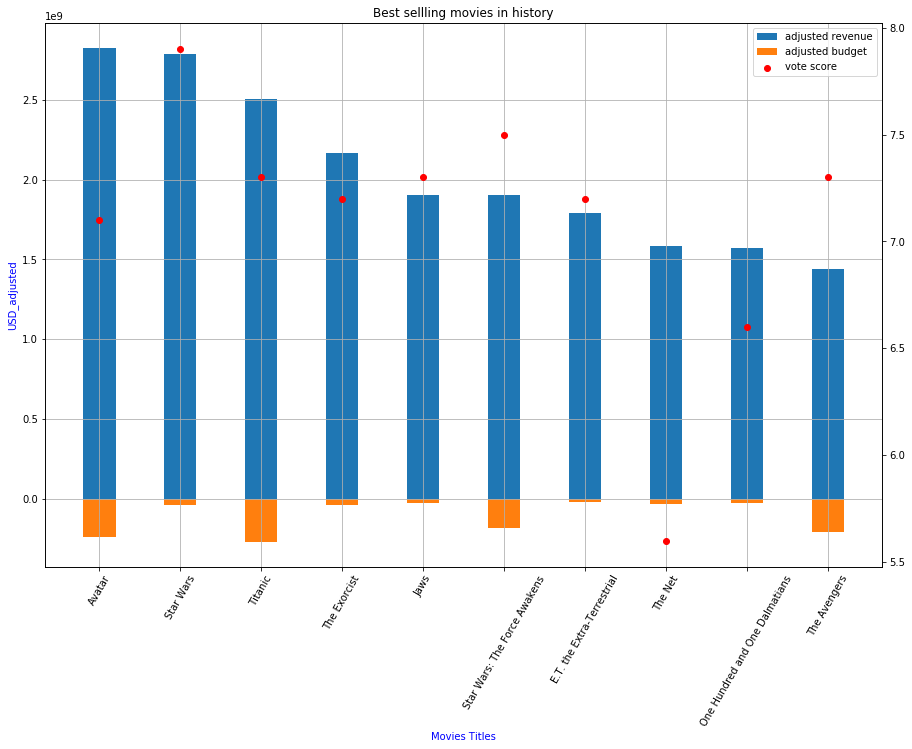

In [12]:
    #进行数据可视化
    #对总收入和总成本做柱状图，对应左边的y轴
    #将大众口碑评分做散点图，对应右边的y轴
    fig, ax1 = plt.subplots(figsize=(15,10))
    width=0.4
    p1 = plt.bar(df2['original_title'], df2['revenue_adj'], width)
    p2 = plt.bar(df2['original_title'], -df2['budget_adj'], width)
    plt.xlabel('Movies Titles',color='b') 
    plt.xticks(rotation=60)
    plt.ylabel('USD_adjusted',color='b')  
    plt.title('Best sellling movies in history')  
    plt.grid()
    ax2 = ax1.twinx()  #在第二根轴上画折线图 
    p3 = plt.scatter(df2['original_title'], df2['vote_average'],color='r')
    ax2.plot()
    plt.legend((p1,p2,p3),('adjusted revenue','adjusted budget','vote score'))
    plt.show()

由上图可见，数据集中票房总收入最高的十大电影从左到右排列，前三名分别是Avatar，对应票房总收入28亿美元；第二名为Star Wars, 对应票房总收入为27亿美元，第三名为Titanic，对应票房收入为25亿美元。

图中桔色柱状图显示的是该电影的成本支出。Avatar和Titanic的成本支出也较高。第二名的Star Wars成本较低。同样，第四名的The Exorcist，第五名的Jaws，和第七名的ET等电影的成本支出虽然低，但仍然取得了很不错的票房收入。可见，并不是所有票房高的电影，都有高的支出，其中不乏小成本的票房黑马。

从上图的大众评分来看，票房总收入和大众评分也不成正比，并不具有强相关性。为了进一步探索总票房和口碑是否具有强相关性，以下我进一步探索数据集中所有电影的票房和口碑的关系。

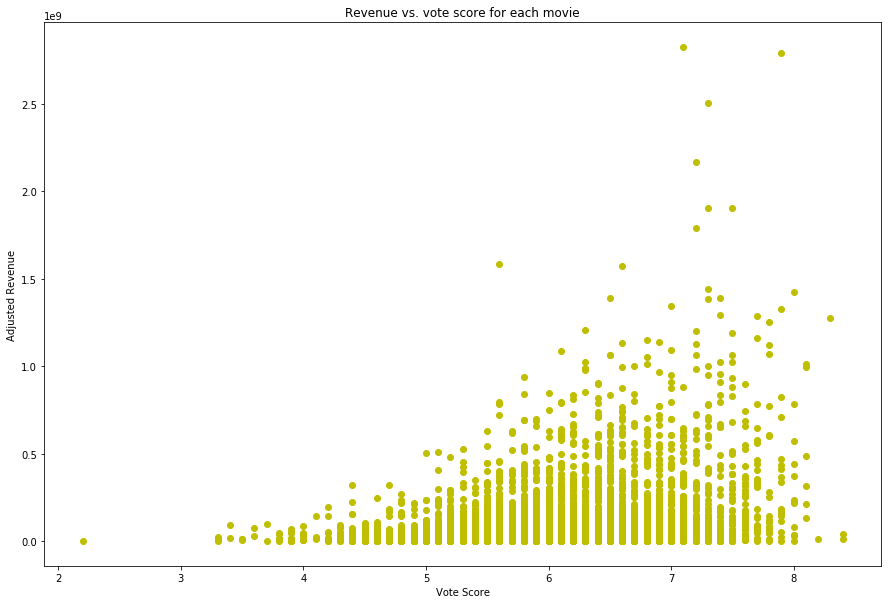

In [13]:
#进行数据可视化
#对整理后的数据集中所有电影的总票房收入vs.大众评分，做散点图，观察相关性
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(df1['vote_average'],df1['revenue_adj'],color ='y')
plt.xlabel('Vote Score') 
plt.ylabel('Adjusted Revenue')  
plt.title('Revenue vs. vote score for each movie') 
plt.show()

以上散点图可见，票房极高的7部电影，它们的大众评分集中在7-8分之间。除此之外，口碑极高的电影，其票房收入跟低口碑的电影的票房一般高。因此，电影票房收入和大众评分并不具有强相关性。

### 研究问题 2： 历年来的电影数量跟时间有何关系？每年电影总收入和总成本随时间有什么变化？

In [14]:
grouped=df1.groupby(['release_year'])
functions =['count','sum']
result = grouped['revenue_adj'].agg(functions)
result   # 查看分组并聚合的数组，为图像可视化做准备

,count,sum
release_year,,
1960,5,9.511497e+08
1961,10,2.463622e+09
1962,7,1.487318e+09
1963,6,1.256903e+09
1964,7,2.310241e+09
1965,5,3.170185e+09
1966,5,5.692623e+08
1967,13,4.783830e+09
1968,9,1.393100e+09


In [15]:
result['release_year']=np.arange(1960,2016)
result['release_year']  # 手动补足grouped中的release_year列,并查看

release_year
1960    1960
1961    1961
1962    1962
1963    1963
1964    1964
1965    1965
1966    1966
1967    1967
1968    1968
1969    1969
1970    1970
1971    1971
1972    1972
1973    1973
1974    1974
1975    1975
1976    1976
1977    1977
1978    1978
1979    1979
1980    1980
1981    1981
1982    1982
1983    1983
1984    1984
1985    1985
1986    1986
1987    1987
1988    1988
1989    1989
1990    1990
1991    1991
1992    1992
1993    1993
1994    1994
1995    1995
1996    1996
1997    1997
1998    1998
1999    1999
2000    2000
2001    2001
2002    2002
2003    2003
2004    2004
2005    2005
2006    2006
2007    2007
2008    2008
2009    2009
2010    2010
2011    2011
2012    2012
2013    2013
2014    2014
2015    2015
Name: release_year, dtype: int32

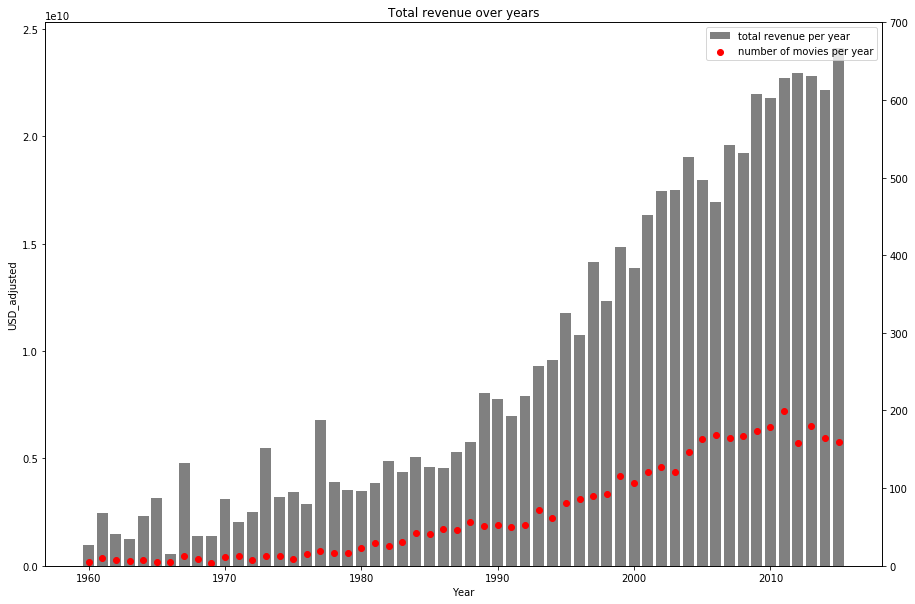

In [16]:
#进行数据可视化
#每年总票房收入vs.年份做柱状图，对应左边Y轴
#每年总电影数据vs.年份做散点图，对应右边Y轴
fig, ax3 = plt.subplots(figsize=(15,10))
p4 = plt.bar(result['release_year'], result['sum'],color='grey')
plt.xlabel('Year') 
plt.ylabel('USD_adjusted')  
plt.title('Total revenue over years')  
   
ax4 = ax3.twinx()
ax4.set_ylim([0, 700])
p5 = plt.scatter(result['release_year'], result['count'],color='r')
ax4.plot()
plt.legend((p4,p5),('total revenue per year','number of movies per year'))  
plt.show()

由上图可见，从1960年到2015年之间，电影票房总收入和制作的电影数量大致上随着年份稳定上升。以下查看一下电影票房收入和制作数量的相关性。

In [17]:
#查看两组series之间的相关系数
result['sum'].corr(result['count'])

0.9794030672262851

以上相关系数可以显示电影总票房收入和制作数量之间存在很强的相关性。但需要特别指出的是，由于在数据清理过程中，清理掉了成本列和收入列中的零值所在的行，故而以上图中的每年制作的电影数量仅为部分电影数量。

### 研究问题 3  历年来最卖座的导演的排名如何？

In [18]:
#针对导演列和总票房收入列进行分组和聚合，并排序列出前20大导演
df3=df1.groupby(['director'])['revenue_adj'].sum()
df4=df3.sort_values(ascending = False)[:20]

Text(0,0.5,'Total Revenue USD')

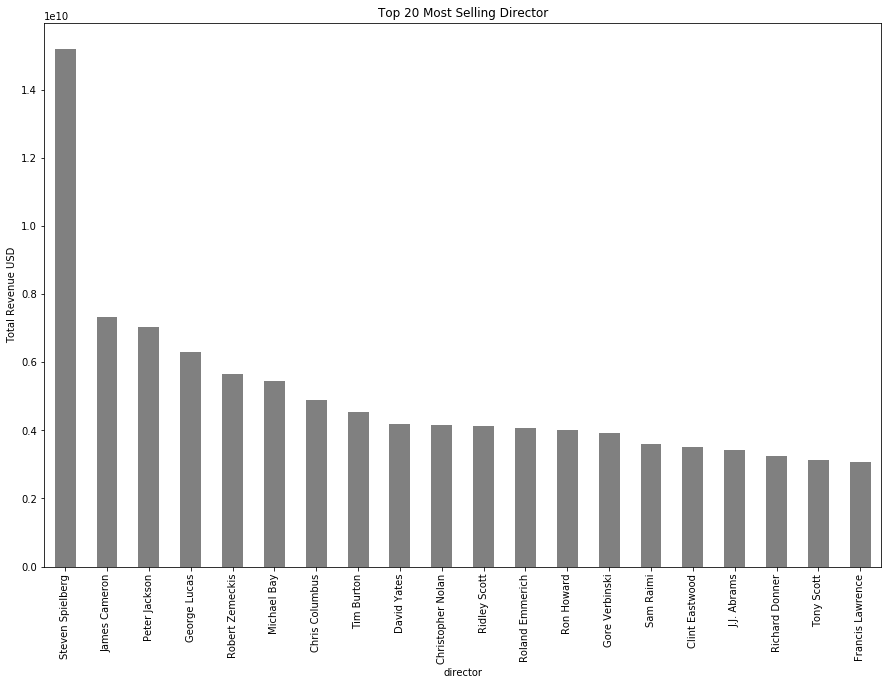

In [23]:
#进行数据可视化，直接调用pandas.plot画柱状图
ax = df4.plot.bar(figsize=(15,10),color='grey', title= 'Top 20 Most Selling Director')
ax.set_ylabel('Total Revenue USD')

由上图可见，票房收入最高的导演为Steven Spielberg，带来大约152亿美元的总收入，冠压群雄，大约为第二名的James Cameron的总票房收入的2倍。第20名的Francis Lawrence也带来约38亿美元。应该为全球最有号召力的导演了。

<a id='conclusions'></a>
## 结论

我们再来回顾一下本项目探索分析的三个问题。
1. 前十大最卖座的电影有哪些，和其成本支出和大众口碑是如何相关的？
2. 历年来的电影数量跟时间有何关系？每年电影总收入和总成本随时间有什么变化？
3. 历年来最卖座的导演的排名如何？

对于第一个问题，前十大卖座电影已经在柱状图中明确显示了，但它们的总票房和成本支出以及大众口碑没有强相关性。
对于第二个问题，历年来，电影制作数量和电影总收入都是随时间稳步上升的，并且电影制作数量和总收入有较强的相关性。
对于第三个问题，历年来前20大最卖座导演已经在柱状图中明确显示，他们创造的生产力从最高的152亿到第20名的38亿美元，无愧于全球最具号召力的导演。

不过以上结论，都是通过初步的数据整理和分析，以及可视化而得出的，没有进行任何统计检验，因此具有局限性，若要得出有说服力的结论，还需后续对数据进行进一步的分析和检验。

## 参考网页
本项目在数据可视化部分参考了以下网页：

https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py
https://blog.csdn.net/Einsam0/article/details/78731953
https://blog.csdn.net/Leige_Smart/article/details/79583470
https://blog.csdn.net/wishchin/article/details/24906175
https://blog.csdn.net/qq_29721419/article/details/71638912


In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295